In [1]:
# Gọi các thư viện cần thiết 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os
import seaborn as sns
import missingno as msno

# Import các metrics cần thiết
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score, recall_score, f1_score

# Gọi các model cần thiết cho bài toán classification 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Sampling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import ClusterCentroids

In [2]:
data = pd.read_csv(r"C:\Users\ADMIN\Documents\AI\COLE\data\archive\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<AxesSubplot: >

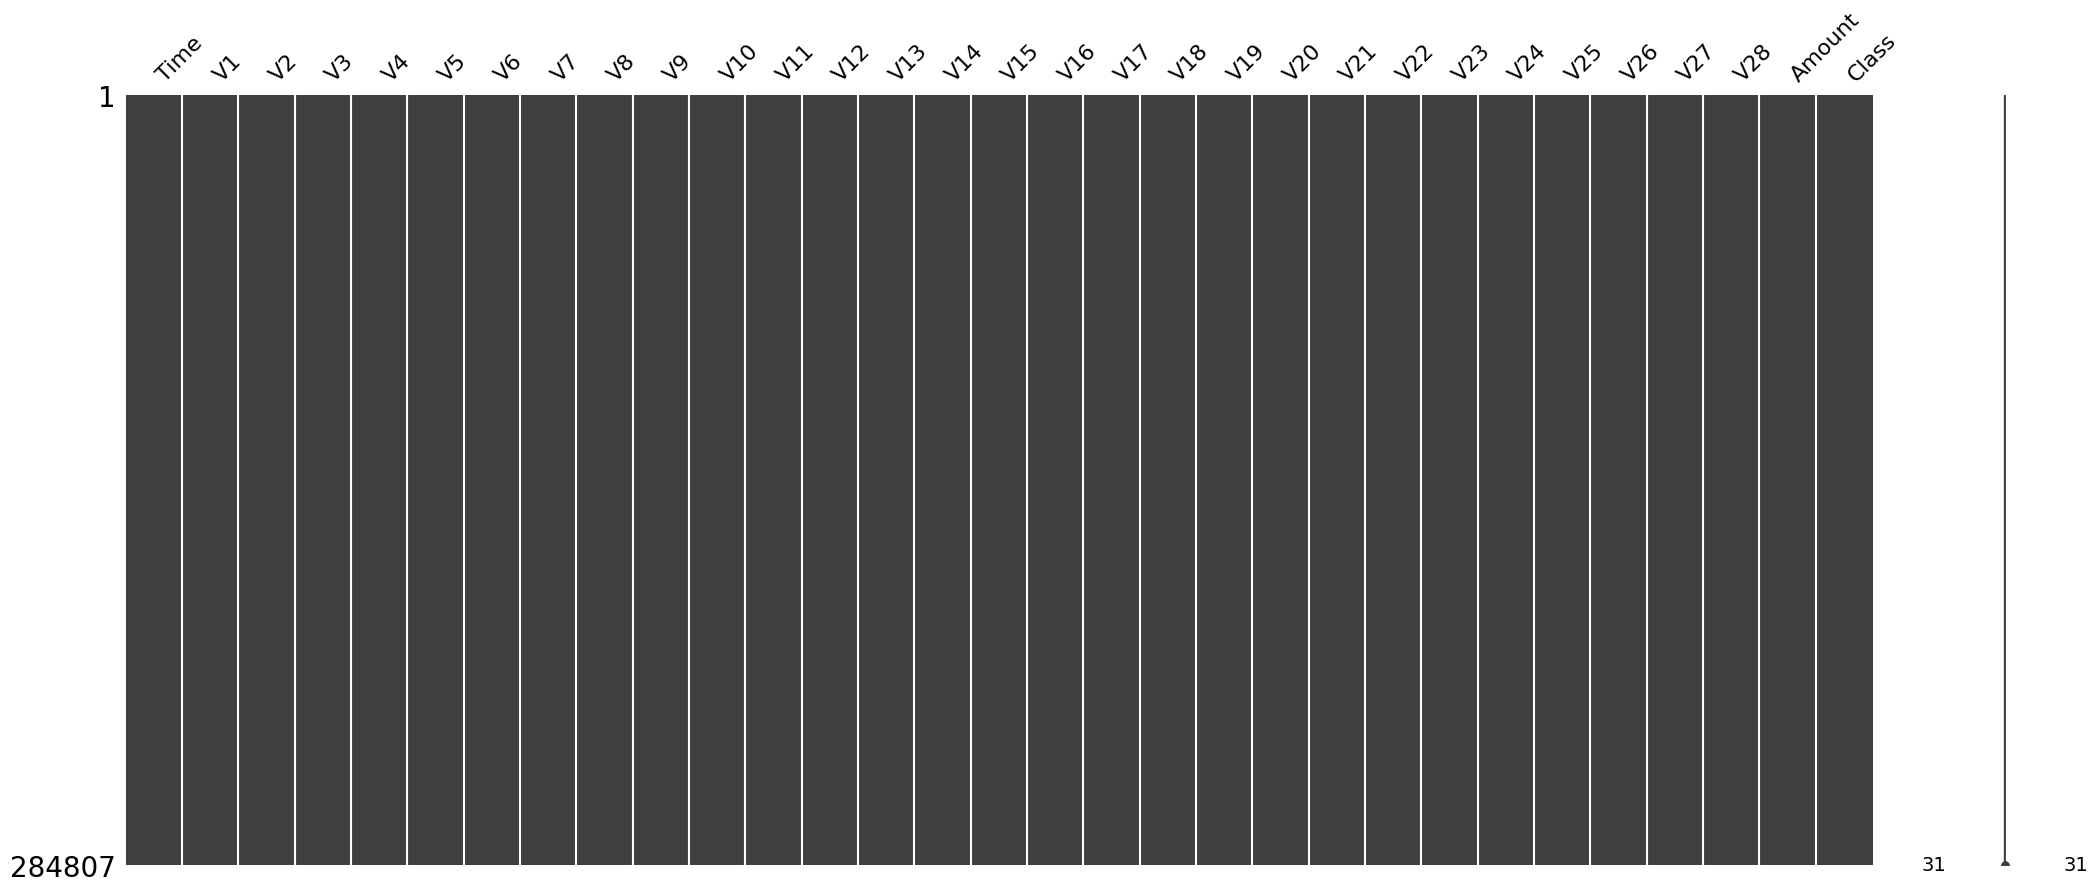

In [4]:
# vẽ biểu diễn null
msno.matrix(data)

492
284315


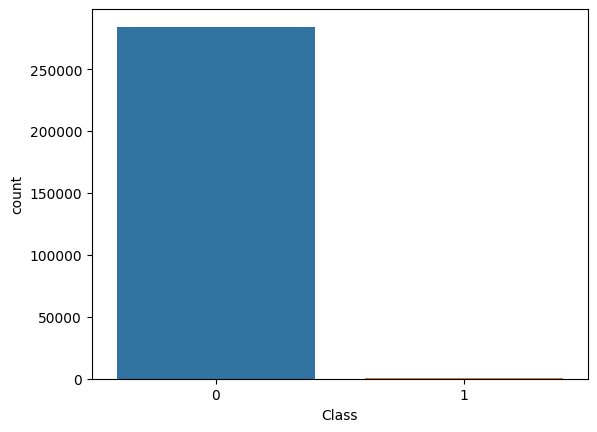

In [5]:
sns.countplot(x = "Class", data = data)
fraud = len(data[data.Class == 1])
no_fraud = len(data[data.Class == 0])
print(fraud)
print(no_fraud)

# TIM hieu ve du liwu

<AxesSubplot: >

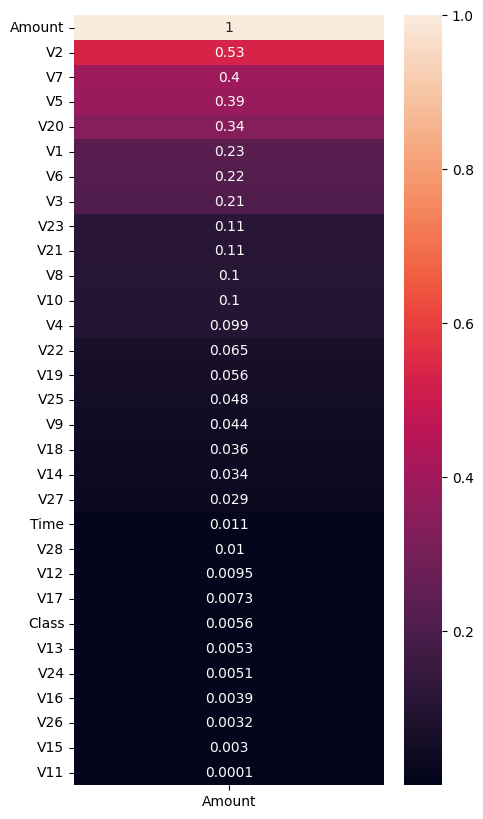

In [6]:
# Tạo corelation matrix của amount và time với các dữ feature còn lại

correlation_matrix = data.corr().abs()
plt.subplots(figsize = (5,10))
sns.heatmap(correlation_matrix[['Amount']].sort_values(by = "Amount", ascending = False), annot = True)

<AxesSubplot: >

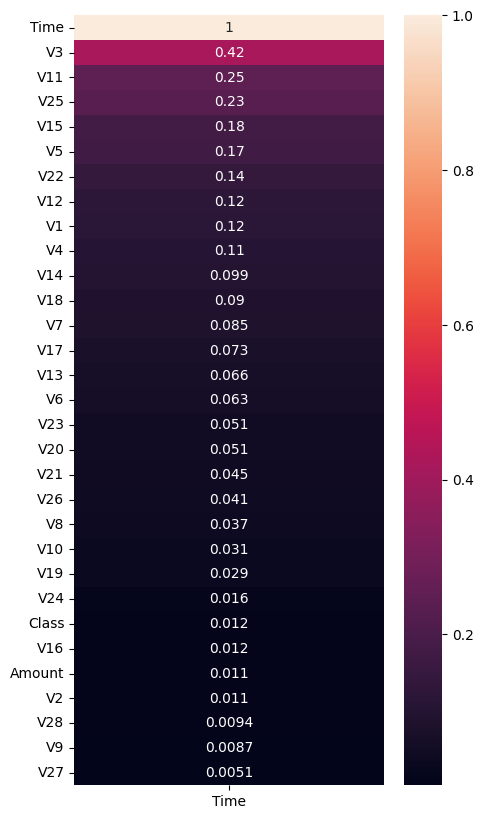

In [7]:
# Tạo corelation matrix của amount và time với các dữ feature còn lại

correlation_matrix = data.corr().abs()
plt.subplots(figsize = (5,10))
sns.heatmap(correlation_matrix[['Time']].sort_values(by = "Time", ascending = False), annot = True)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Class'], axis=1), data['Class'], test_size= 0.3, random_state= 0)

#### sử dụng random forest để đánh giá mức độ quan trọng của các feature


In [9]:
def find_important_feature(X_train, y_train):
    rf = RandomForestClassifier(n_estimators= 100, random_state= 0)
    print("start train")
    rf.fit(X_train, y_train)
    print("End train")

    feature_important = rf.feature_importances_
    im_dict = dict()
    for feature in zip(X_train.columns, feature_important):
        im_dict[feature[0]] = feature[1]
    print("Done")
    return im_dict




In [10]:
score = find_important_feature(X_train, y_train)
feature_name = score.keys()
feature_score = score.values()

start train
End train
Done


<function matplotlib.pyplot.show(close=None, block=None)>

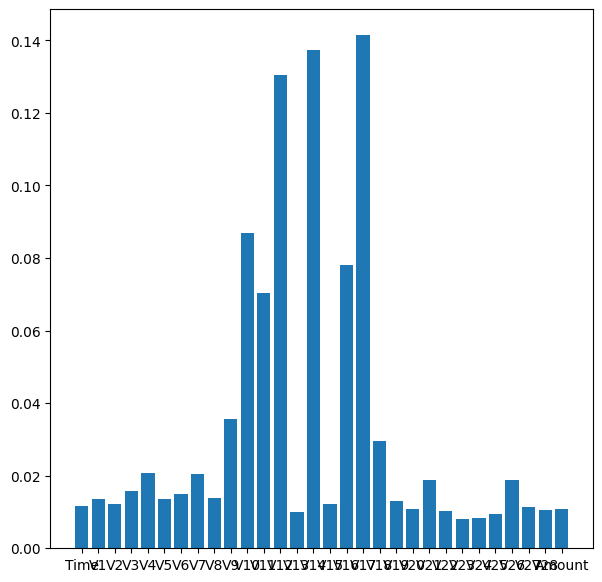

In [11]:
plt.figure(figsize=(7, 7))
plt.bar(feature_name, feature_score)
plt.show

#### thử với logistic Regession

In [12]:
logis_model = LogisticRegression(max_iter= 100)
logis_model.fit(X_train, y_train)
y_predict = logis_model.predict(X_test)


c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
print("Accuracy score: {} %".format(accuracy_score(y_test, y_predict)*100))
print(classification_report(y_test, y_predict))

Accuracy score: 99.89817773252344 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.73      0.64      0.68       147

    accuracy                           1.00     85443
   macro avg       0.87      0.82      0.84     85443
weighted avg       1.00      1.00      1.00     85443



kết quả recall quá thấp 

#### Thu voi randomforest

accuracy score: 0.9994967405170698 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.76      0.84       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



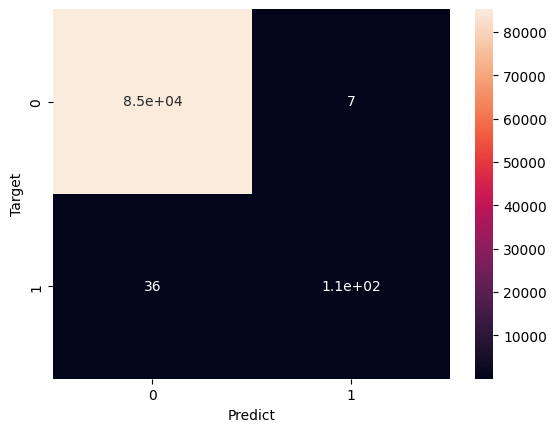

In [16]:
rf_un = RandomForestClassifier(n_estimators= 100, random_state= 0)
rf_un.fit(X_train, y_train)

y_pre = rf_un.predict(X_test)
print("accuracy score: {} %".format(accuracy_score(y_test, y_pre)))
print(classification_report(y_test, y_pre))
sns.heatmap(confusion_matrix(y_test, y_pre), annot = True)
plt.ylabel("Target")
plt.xlabel("Predict")
plt.show()

#### Sử dụng SMOTE để xử lý mất cân bằng dữ liệu 


In [22]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

199019
199019
Ti le giua no_fraud va fraud: 1.0


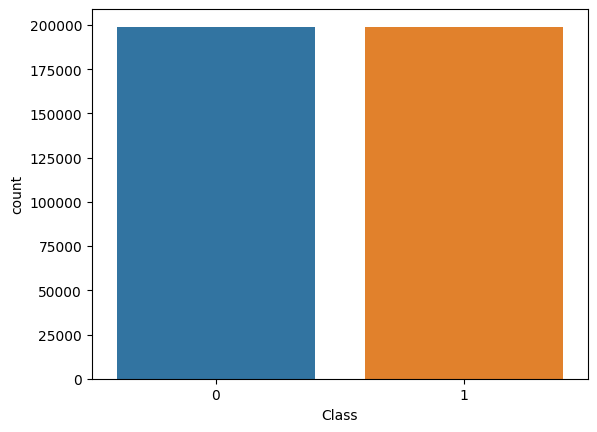

In [25]:
train_data = X_sm.copy()
train_data['Class'] = y_sm

sns.countplot(x = 'Class', data = train_data)
fraud = len(train_data[train_data['Class'] == 1])
no_fraud = len(train_data[train_data["Class"] == 0])
print(fraud)
print(no_fraud)
print('Ti le giua no_fraud va fraud: {}'.format(fraud/no_fraud))

Sau khi resample ta thu được kết quả của feature cân bằng nhau

Accuracy score: 98.1121917535667 %
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.07      0.87      0.14       147

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443



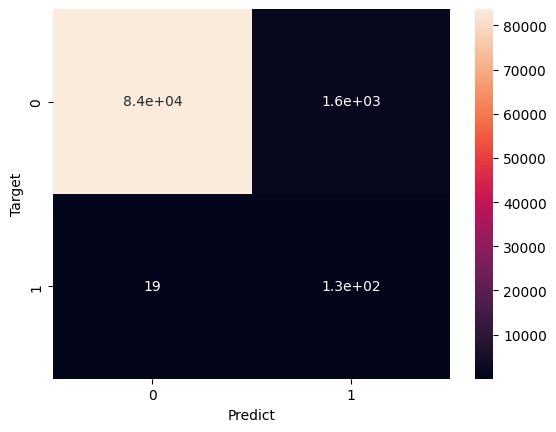

In [26]:
logis_model_sm = LogisticRegression(max_iter=100)
logis_model_sm.fit(X_sm, y_sm)

y_pred = logis_model_sm.predict(X_test)

# In ra accuracy score
print("Accuracy score: {} %".format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.ylabel('Target')
plt.xlabel('Predict')
plt.show()

Accuracy score: 99.95201479348805 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.90      0.82      0.85       147

    accuracy                           1.00     85443
   macro avg       0.95      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



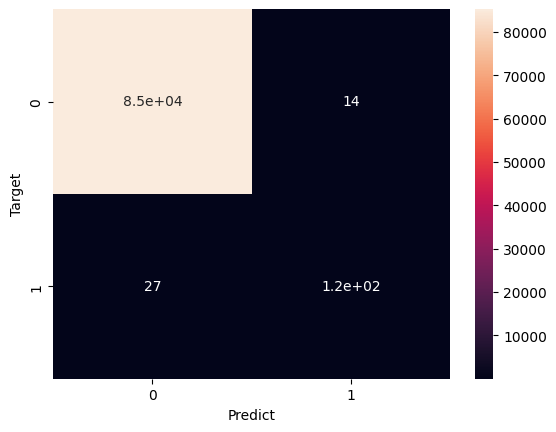

In [27]:
rf_sm = RandomForestClassifier(n_estimators=100, random_state=0)
rf_sm.fit(X_sm, y_sm)

y_pred = rf_sm.predict(X_test)

# In ra accuracy score
print("Accuracy score: {} %".format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.ylabel('Target')
plt.xlabel('Predict')
plt.show()